# 概述
    
    本堂课主要介绍了推荐系统机器学习中的基于隐语义矩阵分解模型模型的另外一种分解方式，奇异矩阵分解法svd。svd的数学原理以及缺点以及在推荐系统中的应用，和对它的改进方法funkSVD、BiasSVD、SVD++算法原理和Surprise中对应的SVD工具的使用，与上节课内容相比SVD、MF、SVD++ 、FM、ALS 均完成了矩阵分解操作，区别在于SVD与 SVD++均需要矩阵填充， 而 funk-svd 与FM、 ALS 均采用MF分解模式，进行隐语义分解
    
   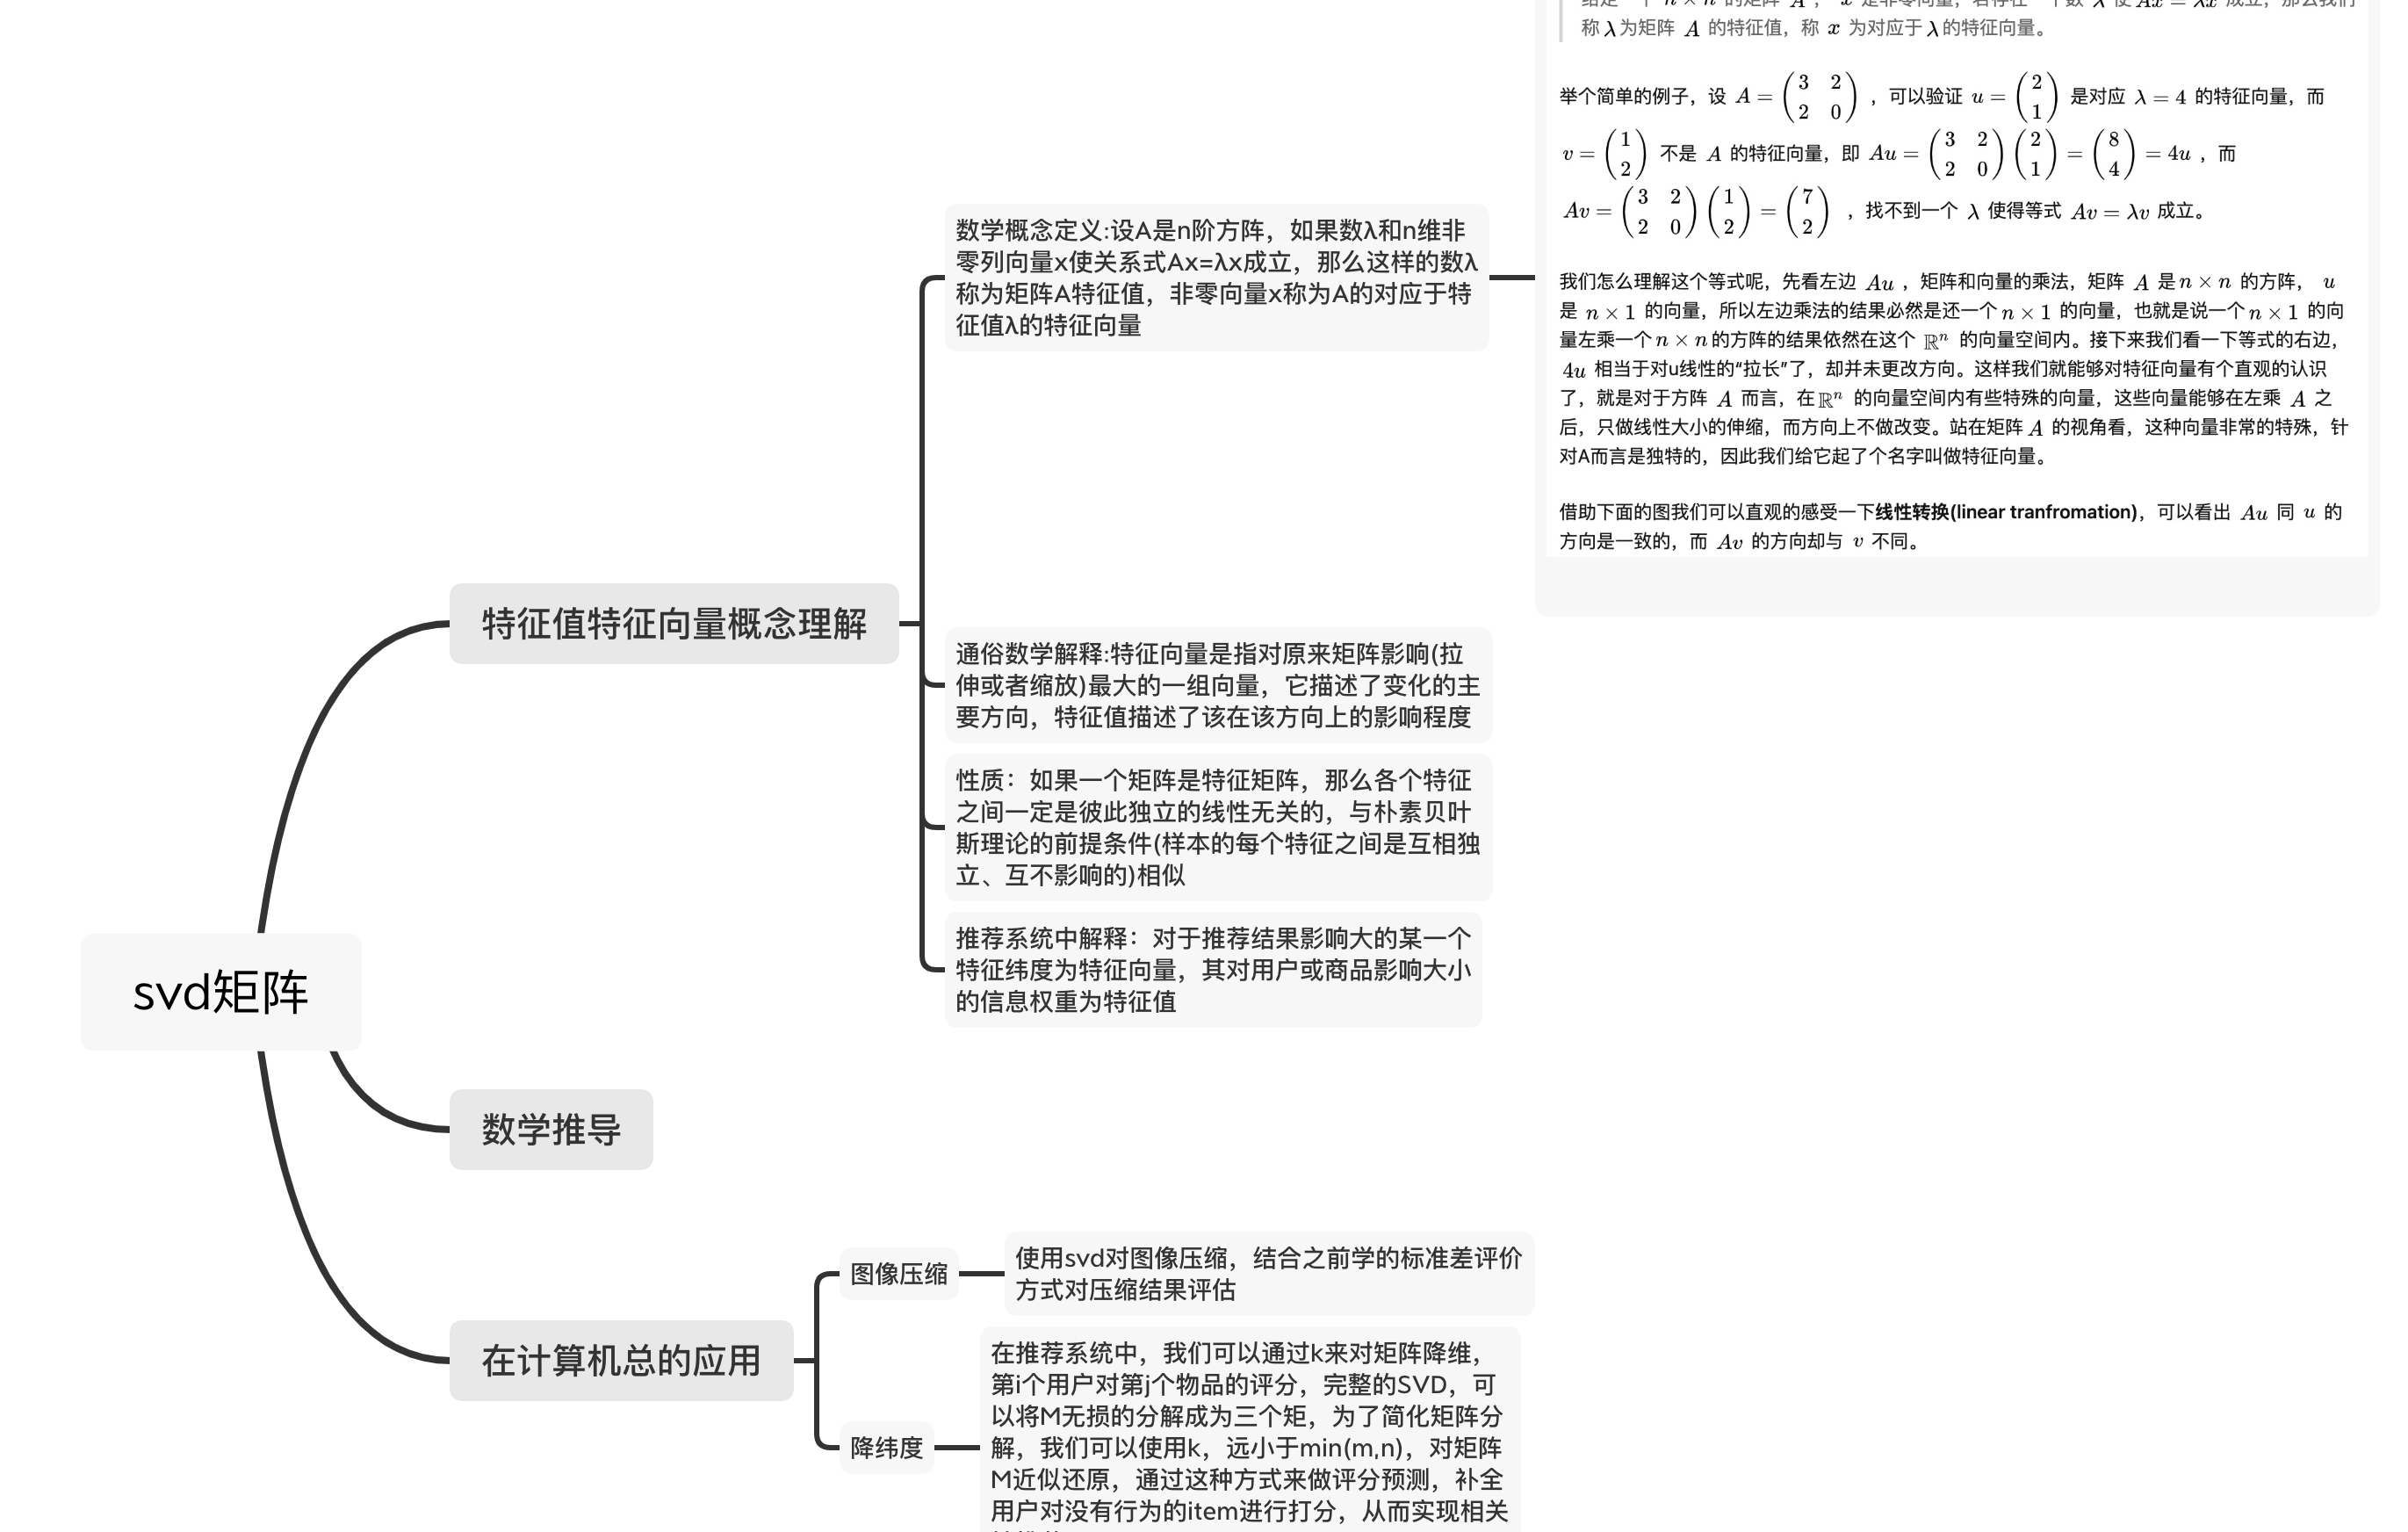
    

 

#  svd矩阵分解原理与概念

## 什么是特征值 特征向量(线性无关的彼此独立的)
  
    在数学中特征向量是指对原来矩阵影响(拉伸或者缩放)最大的一组向量，它描述了变化的主要方向，特征值描述了该在该方向上的影响程度
    其数学概念为：设A是n阶方阵，如果数λ和n维非零列向量x使关系式Ax=λx成立，那么这样的数λ称为矩阵A特征值，非零向量x称为A的对应于特征值λ的特征向量(对于方正A而言，存在一个向量X使得A对X作用后只是对X进行了伸缩，方向并没有改变，则X就称为特征向量，λ为A特征值)
    
    如果一个矩阵是特征矩阵，那么各个特征之间一定是彼此独立的线性无关的，与朴素贝叶斯理论的前提条件(样本的每个特征之间是互相独立、互不影响的)相似
    在推荐系统中通过这两个概念可以提取矩阵的重要特征和对应的权重，
    在图片中可以将每列看作是一个向量，其中影响最大列的被称为特征向量，其权重值被称为特征值
 
  

## svd矩阵分解的数学推导
     根据概念Ax=λx可得到  
     
   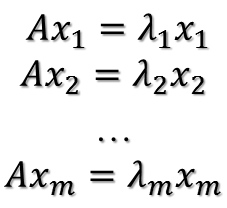
   对其中的x1 x2 向量化可以得到如下内容：
   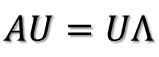
   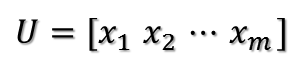
   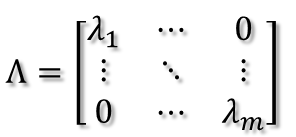
   因为U不是非0矩阵，所以满足可逆条件，所以可得到A的特征值分解（由于对称阵特征向量两两正交，所以U为正交阵，正交阵的逆矩阵等于其转置）
   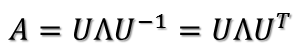
   对于更为一般的m行n列矩阵A，我们可以通过转置矩阵方法构造一个方程如下：
    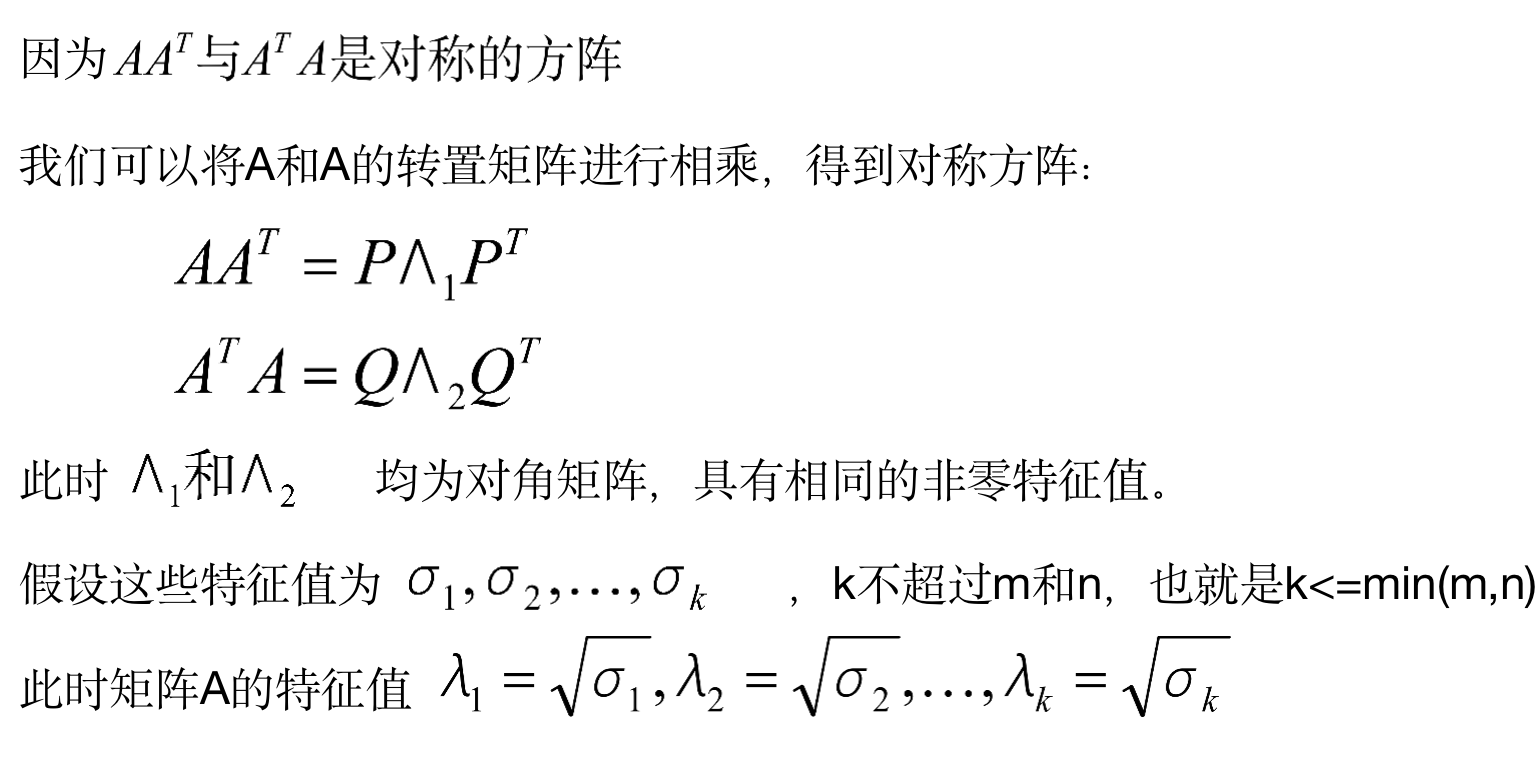
    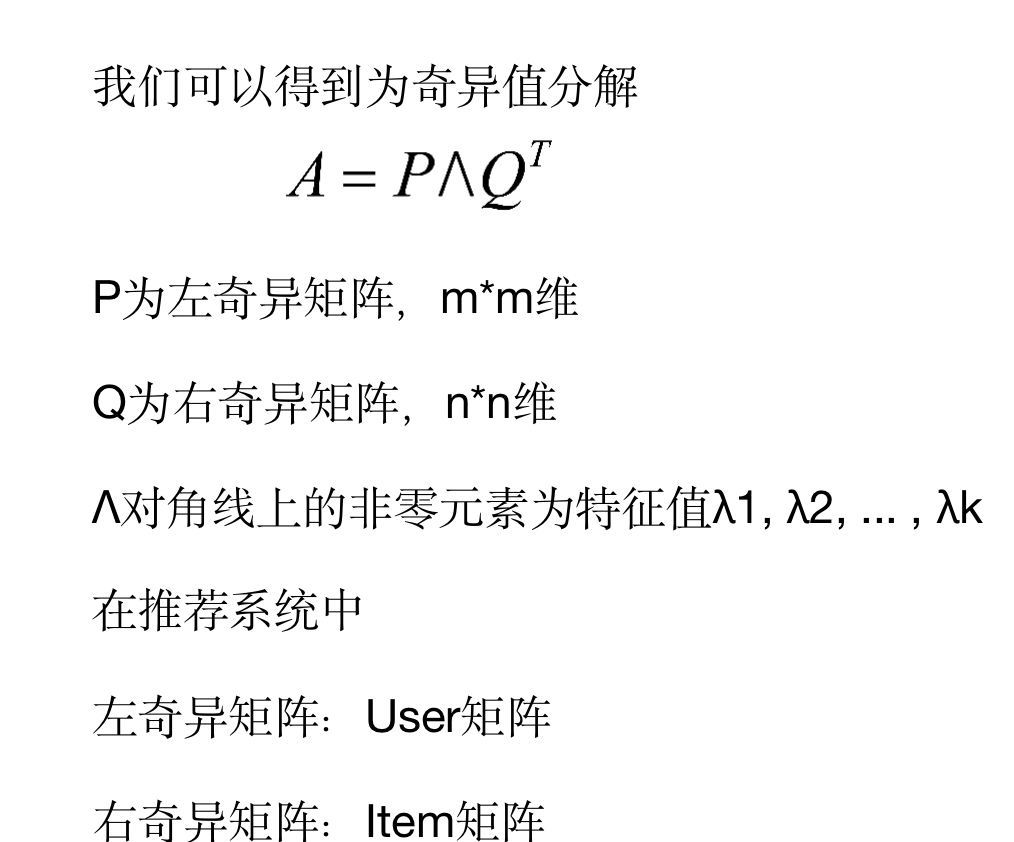
    

## 奇异矩阵在计算机中的应用

    1. 使用svd对图像压缩，结合之前学的标准差评价方式对压缩结果评估
    
    2. 在推荐系统中，我们可以通过k来对矩阵降维，第i个用户对第j个物品的评分，完整的SVD，可以将M无损的分解成为三个矩，为了简化矩阵分解，我们可以使用k，远小于min(m,n)，对矩阵M近似还原，通过svd可以做评分预测，补全用户对没有行为的item进行打分，从而实现相关性推荐
    

## svd矩阵缺点
    1.SVD分解要求矩阵是稠密的 => 矩阵中的元素不能有缺失所以，类似于数据清洗，我们需要先对矩阵中的缺失元素进行补全这会变成一个先有鸡，还是先有蛋。实际上传统SVD更适合做降维，如图片
    2.矩阵往往是稀疏的，大量缺失值， 计算量大
    3.填充方式简单粗暴 导致 噪音大

## 对svd算法的改进
    funkSVD，它与ALS 区别是优化方法不一样，funcksvd是梯度下降  als是交替最小二乘法，als可以并行执行
        算法思想：设置k，来对矩阵近似求解，矩阵补全以后，再预测，矩阵分解之后的还原，只需要关注与原来矩阵中有值的位置进行对比即可，不需要对所有元素进行对比

    BasisSVD 对funksvd的改进,它在FunkSVD矩阵分解基础上加上了偏置项,用户偏好，商品本身偏好，以及所有记录的整体平均值。

    SVD++ 在BasisSVD基础上增加了了用户的隐式反馈部分

svd++算法工作流程：
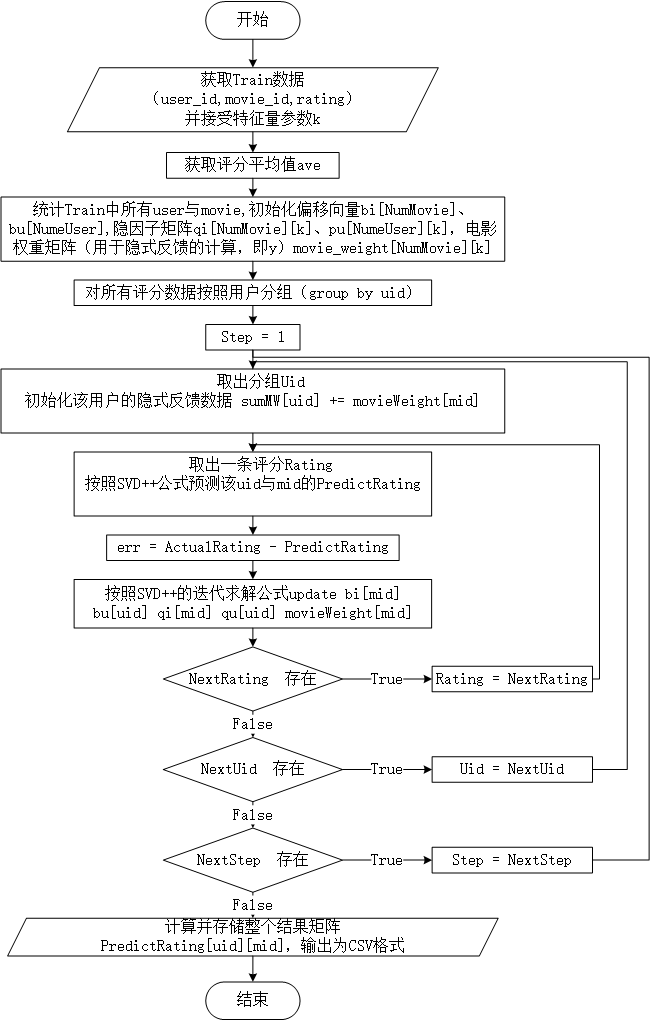

# 基于内容的推荐

  基于内容推荐可以通过embading方式切词，构建分词向量，通过余玄定理来计算相似度，余玄相似度在可以看作是向量A在向量B上的投影部分所占用的长度百分比
  推荐步骤：
   1. 数据清洗，编码格式或者特殊字符等清洗，去除无意义的介词、连词等常用修饰词
   2. 使用分词对内容进行分词处理，中文分词库使用jieba，英文分词库使用nltk
   3. 按照词频TF-IDF或者IDF，按照(min_df, max_df)提取关键词，并生成矩阵
   4. 根据余玄定理计算酒店之间的相似度矩阵
   5. 对于指定的酒店，选择相似度最大的Top-K个酒店进行输出
   
   备注：分词 one-gram 考虑顺序，是以单词为粒度的
        N-Gram 会对词语前后按照语句顺序搭配成n个词组成的语句
   
   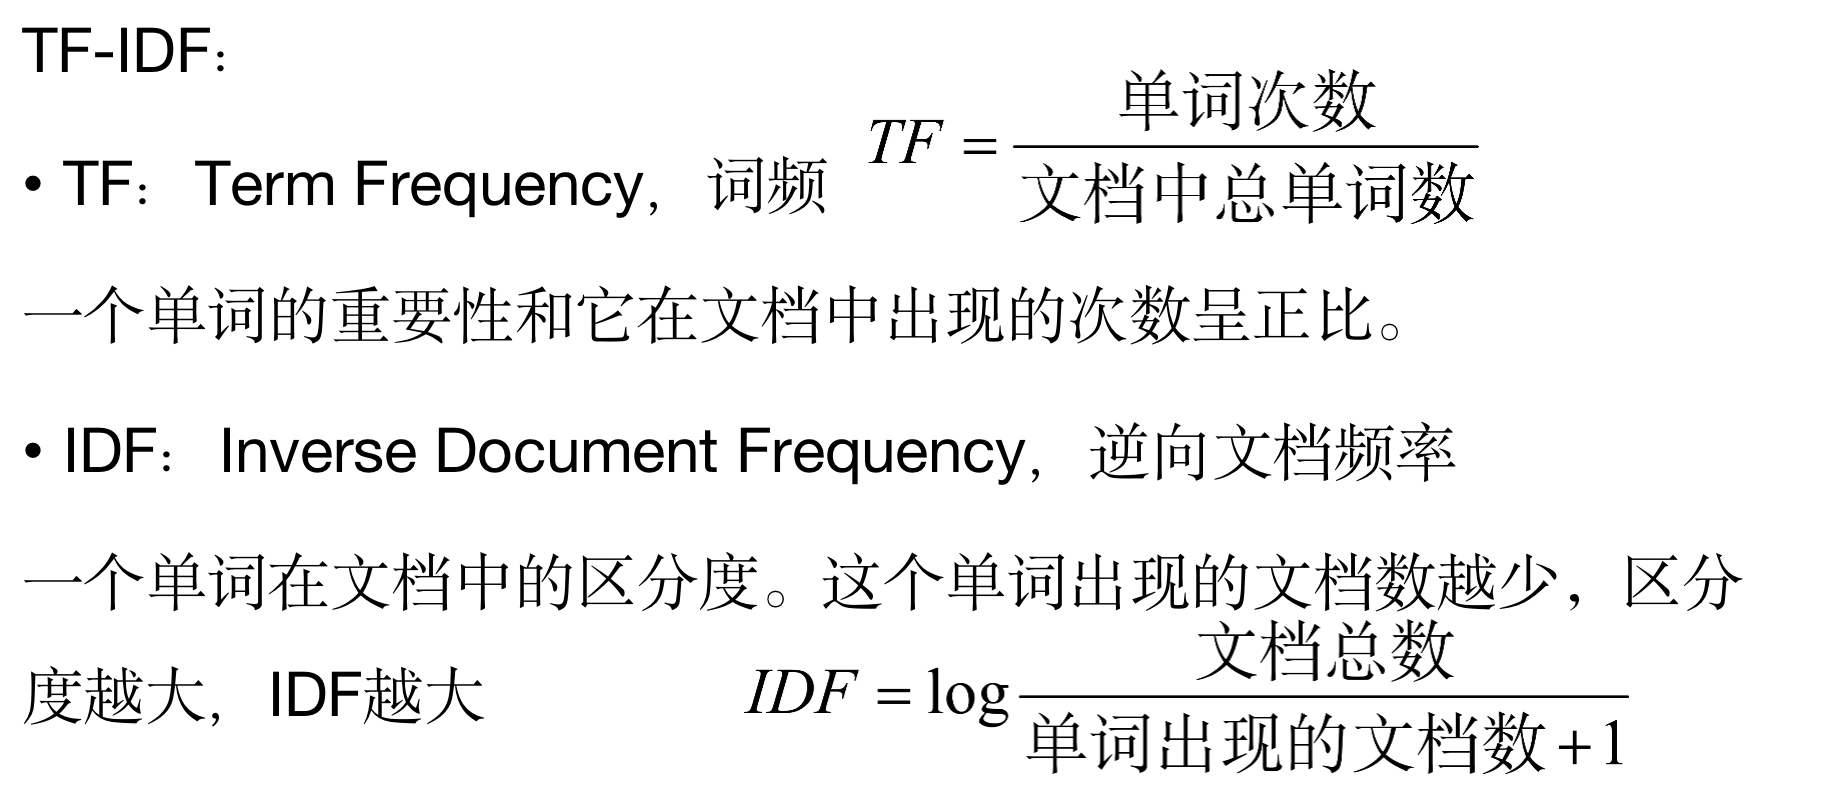
   
  

本节课讲了svd奇异值分解、svd 及其变体在推荐系统中的应用、N-gram 语法、余弦相似度、embedding 等内容。
